In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plot

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime as dt
import matplotlib.pyplot as plot

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
#conn = engine.connect()
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
#Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those 
#classes called `Station` and `Measurement`.
#Example = Base.classes.example

Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
#Link Python to the database by creating an SQLAlchemy session
session = Session(engine)

In [11]:
#inspector for column names
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
    
lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastdate

('2017-08-23')

Last Date:  ('2017-08-23',)
Query Date:  2016-08-23


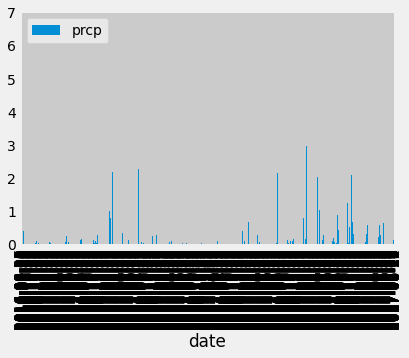

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print("Last Date: ", lastdate)

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(func.strftime(Measurement.date) >= query_date).all()
results  

# Save the query results as a Pandas DataFrame and set the index to the date column

results_df = pd.DataFrame(results, columns=['date','prcp'])

results_df.set_index('date')
# Sort the dataframe by date
results_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot.bar(x='date', y='prcp')
plot.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
groupby_mean = results_df['prcp'].mean()
groupby_median = results_df['prcp'].median()
groupby_variance = results_df['prcp'].var()
groupby_std = results_df['prcp'].std()
groupby_sem = results_df['prcp'].sem()


print("Mean: ", groupby_mean)
print("Median: ", groupby_median)
print("Variance: ", groupby_variance)
print("STD: ", groupby_std)
print("SEM: ", groupby_sem)


Mean:  0.17727857496288965
Median:  0.02
Variance:  0.21269575849618608
STD:  0.4611895038877035
SEM:  0.01025879279145186


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number stations in the dataset
Stationcount = session.query(Measurement.station)
#convert dataframe
Stationcount_df = pd.DataFrame(Stationcount, columns=['station'])
Stationcount_df.nunique()

station    9
dtype: int64

In [61]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

activestation = Stationcount_df["station"].value_counts()

activestation.head(1)

USC00519281    2772
Name: station, dtype: int64

In [76]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Stationtemp = session.query(Measurement.station,Measurement.tobs).filter(Measurement.station == 'USC00519281').all()

Stationtemp_df = pd.DataFrame(Stationtemp, columns=['station','tobs'])

Stationtemp_df
mean = Stationtemp_df['tobs'].mean()
print("Mean temperature: ", mean)
lowest = Stationtemp_df['tobs'].min()
print("Lowest temperature: ", lowest)
highest = Stationtemp_df['tobs'].max()
print("Highest temperature: ", highest)

Mean temperature:  71.66378066378067
Lowest temperature:  54.0
Highest temperature:  85.0


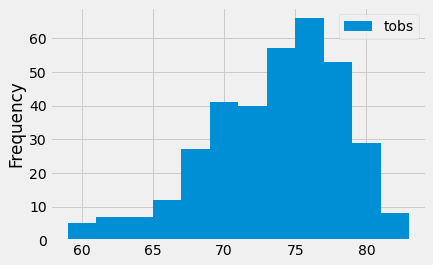

In [80]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temphistory = session.query(Measurement.station,Measurement.tobs,Measurement.date).filter(Measurement.station == 'USC00519281',func.strftime(Measurement.date) >= query_date).all()
Temphistory_df = pd.DataFrame(Temphistory, columns=['station','tobs','date'])
Temphistory_df.plot.hist(by= ['tobs','date'], bins = 12)


# Close session

In [81]:
# Close Session
session.close()

In [ ]:
##flask setup
from flask import Flask, jsonify

app = Flask(__name__)



In [ ]:
#################################################
# Flask Routes
#################################################

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`"
    )



